In [1]:
import numpy as np
import scipy
import sklearn
from sklearn.decomposition import NMF
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture,BayesianGaussianMixture

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
mpl.rcParams['image.cmap'] = 'Greys'
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False



import sys,os,pdb,copy,pickle
from importlib import reload
# import pynapple as nap

sys.path.append('/mnt/home/szheng/projects/seq_detection2/code')
sys.path.append('/mnt/home/szheng/projects/util_code')
sys.path.append('/mnt/home/szheng/projects/nmf_analysis')
sys.path.append('/mnt/home/szheng/projects/nmf_analysis/scripts')
sys.path.append('/mnt/home/szheng/projects/cluster_spikes')
sys.path.append('/mnt/home/szheng/projects/place_variability/code')
import data_prep_new as dpn
import place_cell_analysis as pa
import plot_helper as ph
import preprocess as prep
import nmf_analysis as na
import nmf_plot as nmfp
reload(na)

import raster_new as rn
import data_prep_pyn as dpp


import change_point_analysis as cpa
import change_point_plot as cpp

import place_field_analysis as pf

import switch_analysis_one_session as saos
reload(saos)

import process_central_arm as pca 
import change_point_analysis_central_arm_seperate as cpacas

import misc
reload(misc)
from misc import get_nth_key, get_nth_val

67 sessions!
67 sessions!


/mnt/home/szheng/ceph/envs/jax/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [4]:
figdir = '/mnt/home/szheng/ceph/place_variability/fig/paper/figure_stability_after_switch/supp'
misc.get_or_create_subdir(figdir)
data_dir = '/mnt/home/szheng/ceph/place_variability/data/paper'
misc.get_or_create_subdir(data_dir)

/mnt/home/szheng/ceph/place_variability/fig/paper/figure_stability_after_switch/supp made!


'/mnt/home/szheng/ceph/place_variability/data/paper'

In [2]:
import database
db = database.db

subdb = db.query('owner=="roman"').sort_values('n_pyr_putative',ascending=False)
subdb = subdb.query('ntrials>=20&n_neurons>=50')
to_exclude_sess = ['e16_3m2_211211']
subdb=subdb.loc[~subdb['sess_name'].isin(to_exclude_sess)]


import pf_recombine_central as pfrc
import fr_map_one_session as fmos
import switch_detection_one_session as sdos
import get_all_switch_add_metrics as gasam

import preprocess_one_session as prepos

In [9]:
fn = 'prepped_data_agg.p'
fn_full = os.path.join(data_dir,fn)
prepped_data_agg = pickle.load(open(fn_full,'rb'))

all_fields_recombined_all = prepped_data_agg['all_fields_recombined_all']
pf_params_recombined_all=  prepped_data_agg['pf_params_recombined_all']
# fr_map_trial_df_all= prepped_data_agg['fr_map_trial_df_all']
# pval_all = prepped_data_agg['pval_all']
# X_pwc_all = prepped_data_agg['X_pwc_all']
# X_raw_all = prepped_data_agg['X_raw_all']
# changes_df_all = prepped_data_agg['changes_df_all']
# var_res_all = prepped_data_agg['var_res_all']
# corr_all = prepped_data_agg['corr_all']
# all_sw_d_all = prepped_data_agg['all_sw_d_all']
# all_sw_with_metrics_d_all = prepped_data_agg['all_sw_with_metrics_d_all']
# best_n_all = prepped_data_agg['best_n_all']
# spk_beh_df_all = prepped_data_agg['spk_beh_df_all']

# ntrials_per_tt=fr_map_trial_df_all.groupby(level=(0,1,2,3)).apply(lambda x:x.dropna(axis=1,how='all').shape[1])
# ntrials_mask = ntrials_per_tt.groupby(level=(0,1,2)).apply(lambda x:(x>=7).all()) 


In [6]:
import switch_detection_sweep_penalty_one_session as sdspos
pen=0.3#0.5#0.5

best_n_all = {}
X_pwc_all={}
changes_df_all={}
var_res_all={}
corr_all = {}
p_corr_all = {}

for ind,row in subdb.iterrows():
    data_dir_full = row['data_dir_full']
    ani = ind[0]
    sess = row['sess_name']
    sw_res_pelt = sdspos.main(data_dir_full,force_reload=False,dosave=False,load_only=True)
    sw_res_pelt = sw_res_pelt[pen]
    
    best_n_all[ani,sess]=sw_res_pelt['best_n']
    X_pwc_all[ani,sess]=sw_res_pelt['X_pwc']
    changes_df_all[ani,sess]=sw_res_pelt['changes_df']
    var_res_all[ani,sess]=sw_res_pelt['var_res']
    corr_all[ani,sess]=sw_res_pelt['corr']
    p_corr_all[ani,sess]=sw_res_pelt['p_corr']
    
best_n_all = pd.concat(best_n_all,axis=0)
X_pwc_all = pd.concat(X_pwc_all,axis=0)
changes_df_all = pd.concat(changes_df_all,axis=0)
var_res_all = pd.concat(var_res_all,axis=0)
corr_all = pd.concat(corr_all,axis=0)
p_corr_all = pd.concat(p_corr_all,axis=0)

/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_210913/py_data/penalty_sw_res_afterheadscan_fr_peak.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220117/py_data/penalty_sw_res_afterheadscan_fr_peak.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220118/py_data/penalty_sw_res_afterheadscan_fr_peak.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220119/py_data/penalty_sw_res_afterheadscan_fr_peak.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e15/e15_13f1/e15_13f1_220120/py_data/penalty_sw_res_afterheadscan_fr_peak.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_211019/py_data/penalty_sw_res_afterheadscan_fr_peak.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_16f1/e13_16f1_210328/py_data/penalty_sw_res_afterheadscan_fr_peak.p exists; loading---
/mnt/home/szheng/ceph/ad/roman_data/e13/e13_26m1/e13_26m1_211116/py_data/penalty_sw

# stability after pop up

In [7]:
import stability_analysis as sa

In [10]:
reload(sa)
par_key = 'peak'
var_func='std'
ntrials_after_sw = 5
par_var_nosw_sw_df,par_nosw_sw_df = sa.get_sw_no_sw_pf_par_var_control_ntrial(changes_df_all,pf_params_recombined_all,par_key=par_key,var_func=var_func,ntrials_after_sw=ntrials_after_sw)





p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

sw_0 vs. sw_1: Mann-Whitney-Wilcoxon test two-sided, P_val:1.551e-04 U_stat=2.512e+05
nosw_0 vs. nosw_1: Mann-Whitney-Wilcoxon test two-sided, P_val:3.438e-17 U_stat=1.854e+06
nosw_0 vs. sw_0: Mann-Whitney-Wilcoxon test two-sided, P_val:2.713e-27 U_stat=4.376e+06
nosw_1 vs. sw_1: Mann-Whitney-Wilcoxon test two-sided, P_val:7.668e-19 U_stat=2.318e+05


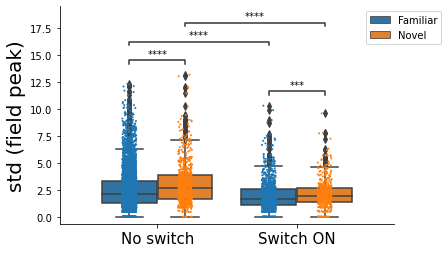

In [12]:
x='has_sw'
y=f'{par_key}_{var_func}'
hue='isnovel'


fig,ax=plt.subplots()
data = par_var_nosw_sw_df

sns.stripplot(data=data,x=x,y=y,hue=hue,ax=ax,order=['nosw','sw'],dodge=True,alpha=1,s=2.)

sns.boxplot(data=data,x=x,y=y,hue=hue,ax=ax,order=['nosw','sw'])
sns.despine()
ax.set(ylabel=f'{var_func} (field {par_key})',xlabel='')
ax.set_xticklabels(['No switch','Switch ON'],fontsize=15)

handles,labels=ax.get_legend_handles_labels()
new_labels=['Familiar','Novel']
ax.legend(handles[2:], new_labels,bbox_to_anchor=[0.9,1])

## add test
from statannotations.Annotator import Annotator

# pairs = [(0,2),(1,2),(0,1)]
pairs = [
    (('nosw',0),('sw',0)),
    (('nosw',1),('sw',1)),
    (('nosw',0),('nosw',1)),
    (('sw',0),('sw',1)),
]


annotator = Annotator(ax, pairs, data=data, x=x,hue=hue, y=y)
annotator.configure(test='Mann-Whitney', text_format='star')#, loc='outside')
annotator.apply_and_annotate()

for fmt in ['png','svg']:
#     fig_fn = f'var_{par_key}_vs_sw_fam_nov.{fmt}'
    fig_fn = f'{y}_vs_{x}_hue_{hue}_ntrials_after_sw_{ntrials_after_sw}_pen{pen:.0e}.{fmt}'
    fig_fn_full = os.path.join(figdir,fig_fn)
    fig.savefig(fig_fn_full,bbox_inches='tight')



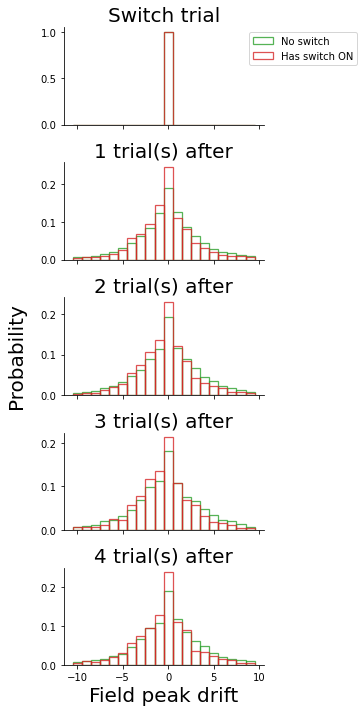

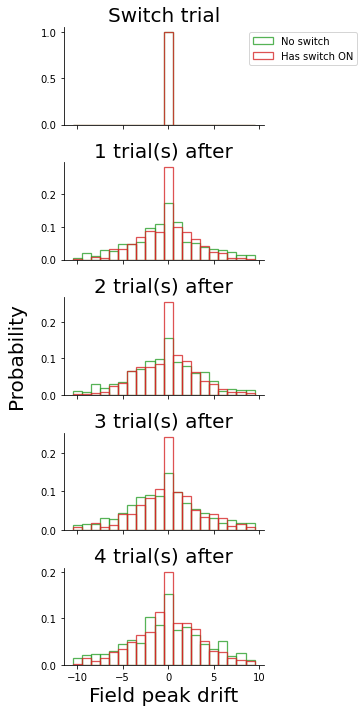

In [13]:
par_nosw_sw_df_relative=par_nosw_sw_df - par_nosw_sw_df[0].values[:,None]

isnovel = 0
for isnovel in [0,1]:
    nplots = par_nosw_sw_df.shape[1]
    fig,axs=plt.subplots(nplots,1,sharex=True,figsize=(5,10))
    bins = np.arange(-10.5,10.5,1)
    c_d = {'nosw':'C2','sw':'C3'}
    for hassw in ['nosw','sw']:
        color=c_d[hassw]
        data=par_nosw_sw_df_relative.loc[(hassw,slice(None),slice(None),isnovel),:]


        for ii,c in enumerate(range(nplots)):
            ax=axs.ravel()[ii]
            sns.histplot(data=data[c],stat='probability',ax=ax,fill=False,bins=bins,alpha=0.8,color=color,label=hassw)
            if c ==0:
                title = 'Switch trial'
            else:
                title = f'{c} trial(s) after'
            ax.set(xlabel='',ylabel='',title=title)
            sns.despine()
    axs[0].legend(['No switch','Has switch ON'],bbox_to_anchor=[0.9,1])
    axs[-1].set(xlabel=f'Field {par_key} drift')
    fig.supylabel('Probability',fontsize=20)
    plt.tight_layout()

    for fmt in ['png','svg']:
        fn_full = f'{par_key}_drift_histogram_isnovel_{isnovel}_ntrials_after_sw_{ntrials_after_sw}_pen{pen:.0e}.{fmt}'

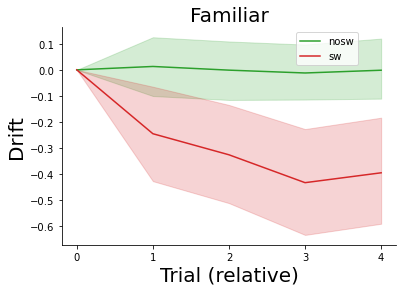

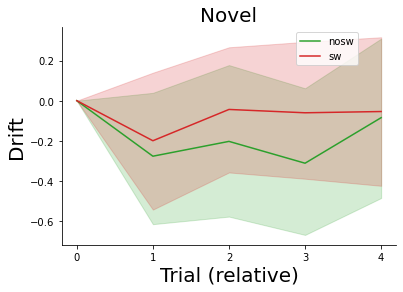

In [14]:
par_nosw_sw_df_relative_melt=par_nosw_sw_df_relative.groupby(level=(0,3)).apply(lambda x:x.melt()).reset_index(level=(0,1)).rename({'variable':'n_trial_after','value':'drift','level_0':'has_sw','level_1':'isnovel'},axis=1)
par_nosw_sw_df_relative_melt = par_nosw_sw_df_relative_melt.reset_index(drop=True)


palette={'nosw':'C2','sw':'C3'}

isnovel_str_d={0:'Familiar',1:'Novel'}
for isnovel in [0,1]:
    fig,ax=plt.subplots()
    sns.lineplot(data=par_nosw_sw_df_relative_melt.query('isnovel==@isnovel'),x='n_trial_after',y='drift',hue='has_sw',palette=palette,ax=ax,estimator='mean')
    sns.despine()
    ax.legend(bbox_to_anchor=[0.9,1.])
    ax.set(ylabel='Drift',xlabel='Trial (relative)')
    ax.set(xticks=par_nosw_sw_df.columns)
    ax.set_title(isnovel_str_d[isnovel])




# cosw

In [8]:
import test_co_switch as tcs

In [12]:
ani='e13_26m1'#'e15_13f1'
sess='e13_26m1_211116'#'e15_13f1_220117'
changes_df_pen = changes_df_all.loc[ani,sess]

/tmp/ipykernel_695603/3332012181.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  changes_df_pen = changes_df_all.loc[ani,sess]


In [114]:
import test_co_switch as tcs
# changes_df_shuffle = tcs.gen_circular_shuffle_trialtype_seperated(changes_df_pen,nrepeats=200,min_cpd_win=2)
changes_df_shuffle = tcs.gen_circular_shuffle_trialtype_seperated(changes_df_pen,nrepeats=400,min_cpd_win=2)
cosw_pval_pen, n_pair_all_n_co_pen, n_pair_all_n_co_shuffle_pen=\
tcs.test_co_switch_all_task(changes_df_pen,changes_df_shuffle_all_task=changes_df_shuffle,window_l=[0,1],n_co_l=[2,3],shuffle_kwargs={})


In [115]:
cosw_pval_pen

   onoff  n_trial_lag  n_in_tuple
0   1     0            2             0.3375
                       3             0.2825
                       4             0.2600
          1            2             0.1675
                       3             0.1400
                       4             0.1125
          2            2             0.0950
                       3             0.0750
                       4             0.0800
   -1     0            2             0.0350
                       3             0.0425
                       4             0.0575
          1            2             0.0200
                       3             0.0325
                       4             0.0500
          2            2             0.0100
                       3             0.0200
                       4             0.0375
dtype: float64

In [13]:
# coswtest_res,share_shuffle=tcs.shuffle_test_pair_share_onoff(changes_df_pen.loc[(slice(None),['both',0]),:],nrepeats=400,alpha=0.025,min_cpd_win=2)
coswtest_res,share_shuffle=tcs.shuffle_test_pair_share_onoff(changes_df_pen,nrepeats=400,alpha=0.025,min_cpd_win=2)



In [14]:
coswtest_res

count  onoff                0.0
       on                  97.0
       off                 91.0
       onoff_ratio_on       0.0
cdf    onoff                0.0
       on                0.7725
       off                 0.77
       onoff_ratio_on       0.0
issig  onoff              False
       on                 False
       off                False
       onoff_ratio_on     False
dtype: object

### switch one field predict another?

In [7]:
%%time
import multi_field_analysis as mfa
reload(mfa)
has_sw_df = mfa.get_sw_multifield_info(changes_df_all,all_fields_recombined_all,level=(0,1,2,3,4))

/mnt/home/szheng/projects/place_variability/code/multi_field_analysis.py:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_both_part['other_field_index']=field_index_for_both_from_another_tt


INFO: Pandarallel will run on 40 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.
CPU times: user 8 s, sys: 1.03 s, total: 9.02 s
Wall time: 17.9 s


In [9]:
from statannotations.Annotator import Annotator

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

True_False vs. True_True: Mann-Whitney-Wilcoxon test two-sided, P_val:2.468e-20 U_stat=9.923e+06
False_False vs. True_False: Mann-Whitney-Wilcoxon test two-sided, P_val:3.803e-35 U_stat=2.191e+07
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

True_False vs. True_True: Mann-Whitney-Wilcoxon test two-sided, P_val:2.652e-07 U_stat=7.300e+06
False_False vs. True_False: Mann-Whitney-Wilcoxon test two-sided, P_val:2.448e-27 U_stat=2.450e+07
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

True_False vs. True_True: Mann-Whitney-Wilcoxon test two-sided, P

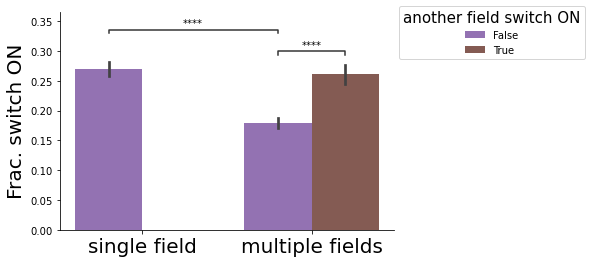

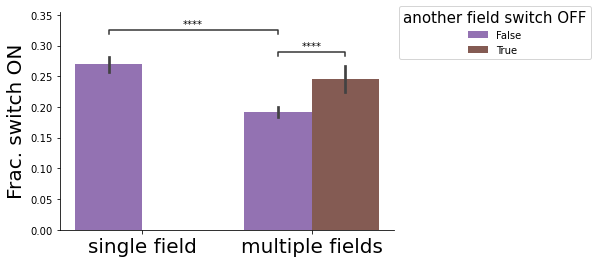

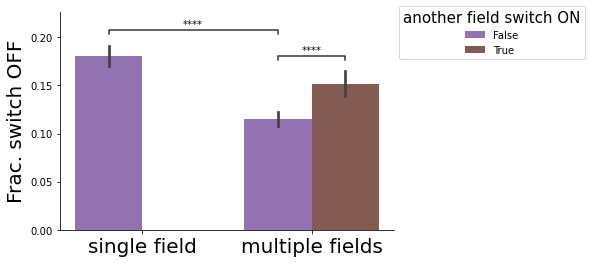

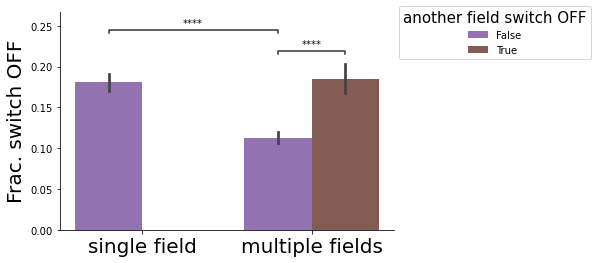

In [10]:
data=has_sw_df
x = 'multiple_field'
palette = {0:'C4',1:'C5'}
for onoff_str in ['on','off']:
    for other_onoff_str in ['on','off']:
        other_onoff_str_plot=f'another field switch {other_onoff_str.upper()}'
        other_onoff_key = f'other_{other_onoff_str}'
        data[other_onoff_key] = data[other_onoff_key].astype(bool)
        fig,ax=plt.subplots()
        ax=sns.barplot(data=data,x=x,y=onoff_str,hue=other_onoff_key,ax=ax,order=[0,1],palette=palette)
        sns.despine()
        ax.set_xticklabels(['single field','multiple fields'],fontsize=20)
        ax.set(xlabel="",ylabel=f'Frac. switch {onoff_str.upper()}')
        l=ax.get_legend()
        l.set_title(other_onoff_str_plot)
        plt.setp(l.get_title(),fontsize=15)
        l.set(bbox_to_anchor=[1,1.05])
        
        

        # pairs = [(0,2),(1,2),(0,1)]
        pairs = [
            ((0,False),(1,False)),
            ((1,False),(1,True)),
        ]
        annotator = Annotator(ax, pairs, data=data, x=x,hue=other_onoff_key, y=onoff_str)
        annotator.configure(test='Mann-Whitney', text_format='star', loc='inside')
        annotator.apply_and_annotate()

        
#         for fmt in ['png','svg']:
#             fn_full=os.path.join(figdir,f'frac_sw_{onoff_str}_vs_multiple_field_hue_{other_onoff_key}.{fmt}')
#             fig.savefig(fn_full,bbox_inches='tight')

        